# **Project Name** - **FBI Time Series Forecasting**
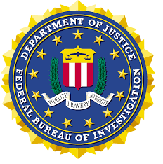




##### **Project Type**   - Supervised Learning – Time Series Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Adarsha Kumar Karna


# **Project Summary -**

**Project Summary:** **`FBI Time Series Forecasting`**

**Introduction:**
Time series forecasting is a crucial analytical technique used to predict future data points based on historical trends. In the case of law enforcement, time series forecasting can help anticipate crime rates, detect patterns, and optimize resource allocation. This project aims to apply time series forecasting techniques to FBI crime data to predict future incident counts and support data-driven decision-making for law enforcement agencies.

**Problem Statement:**

Crime prediction is one of the most significant challenges faced by law enforcement agencies. Understanding crime trends over time can enable better policing strategies and resource distribution. However, crime data often exhibit seasonality, trends, and fluctuations, making accurate forecasting a complex task. This project leverages machine learning and statistical models to analyze and forecast crime incidents, enabling proactive crime prevention measures.

**Objectives:**

* Perform exploratory data analysis (EDA) to understand crime trends.

* Test stationarity and transform data accordingly.

* Build and compare various time series forecasting models such as ARIMA, SARIMA, Prophet, and machine learning models like XGBoost.

* Evaluate model performance using metrics like MAE, MSE, RMSE, MAPE, AIC, and BIC.

* Provide insights into crime patterns to assist law enforcement agencies in strategic planning.

**Data Overview:**
The dataset consists of two files:

**Train Dataset:** Contains historical crime incident counts with attributes such as Date, Incident_Counts, Month, and transformed features (log, square root, etc.).

**Test Dataset:** Lacks Incident_Counts, requiring forecasting techniques to predict future values.

Methodology
1️⃣ **Exploratory Data Analysis (EDA):**

Visualize trends, seasonality, and cyclic patterns in crime data.

Use different time series plots like line plots, seasonal decomposition, autocorrelation plots, and histograms.

2️⃣ **Stationarity Testing & Transformation:**

Apply Augmented Dickey-Fuller (ADF) and KPSS tests to check stationarity.

Apply differencing, log transformation, and moving averages to make the series stationary.

3️⃣ **Feature Engineering & Data Preprocessing:**

Create lag features, rolling averages, and seasonal indicators.

Handle missing values using rolling mean and forward fill techniques.

Scale and normalize data where required.

4️⃣ **Time Series Forecasting Models:**

**Classical Models:**

ARIMA: Captures autoregressive and moving average components.

SARIMA: Accounts for seasonality in the data.

VAR: Handles multivariate time series forecasting.

**Machine Learning Models:**

XGBoost: Boosting algorithm trained on time-based features.

**Deep Learning Models:**

LSTM: Neural network model designed for sequential data.

**Hybrid Model:**

Combining SARIMA with XGBoost to enhance predictions.

5️⃣ **Model Evaluation:**

Evaluate models using MAE, MSE, RMSE, and MAPE.

Compare AIC and BIC values for model selection.

6️⃣ **Results & Insights:**

Identify seasonal crime patterns and high-risk periods.

Provide recommendations based on crime forecasts for better law enforcement strategies.

**Conclusion:**
This project demonstrates the application of time series forecasting techniques to FBI crime data. By leveraging statistical, machine learning, and deep learning models, we provide valuable insights into crime trends, helping authorities take proactive measures. The findings can assist in optimizing police patrolling, resource allocation, and crime prevention strategies.

# **GitHub Link -**
https://github.com/adrs01

# **Problem Statement**


**Write Problem Statement Here.**

📌 Step 1: **Understanding the Problem Statement**

* **Objective:** Predict the number of crime incidents in the future based on historical data.

* **Datasets:**
  1. **Train.csv:** Contains past crime records.
  2. **Test.csv:** Contains future timestamps for which we need to predict crime counts.

* Time Column: Date
* Target Column: Incident_Counts

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX as VMA
from statsmodels.tsa.statespace.varmax import VARMAX as VARMA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prophet import Prophet


import statsmodels.api as sm


### Dataset Loading

In [ ]:
# Load Dataset
Train = pd.read_excel("/content/drive/MyDrive/FBI project dataset/Train.csv.xlsx")
Test = pd.read_csv("/content/drive/MyDrive/FBI project dataset/Test (2).csv")

### Dataset First View

In [ ]:
# Dataset First Look
display("Train Dataset:\n",Train.head())
display("Test Dataset:\n",Test.head())


'Train Dataset:\n'

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


'Test Dataset:\n'

,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Dataset 1 - Rows: {Train.shape[0]}, Columns: {Train.shape[1]}")
print(f"Dataset 2 - Rows: {Test.shape[0]}, Columns: {Test.shape[1]}")

Dataset 1 - Rows: 474565, Columns: 13
Dataset 2 - Rows: 162, Columns: 4


### Dataset Information

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Dataset 1 - Duplicate Values: {Train.duplicated().sum()}")
print(f"Dataset 2 - Duplicate Values: {Test.duplicated().sum()}")


Dataset 1 - Duplicate Values: 44618
Dataset 2 - Duplicate Values: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

# Missing Values/Null Values Count for dataframe1
for df1, name in [(Train, 'df1')]:
    print(f"Missing Values/Null Values Count for {name}:")
    missing_values = Train.isnull().sum()
    display(missing_values)

    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {name}: {total_missing}\n")

# Missing Values/Null Values Count for dataframe2
for df2, name in [(Test, 'df2')]:
    print(f"Missing Values/Null Values Count for {name}:")
    missing_values = Test.isnull().sum()
    display(missing_values)

    total_missing = missing_values.sum()
    print(f"\nTotal missing values in {name}: {total_missing}\n")

Missing Values/Null Values Count for df1:


,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0



Total missing values in df1: 150234

Missing Values/Null Values Count for df2:


,0
YEAR,0
MONTH,0
TYPE,0
Incident_Counts,162



Total missing values in df2: 162



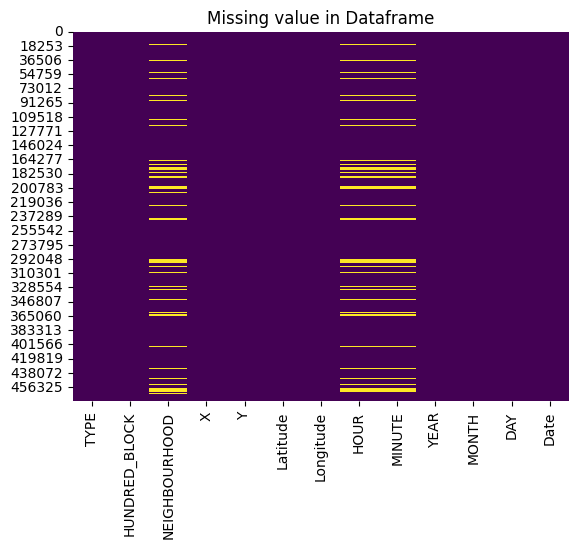

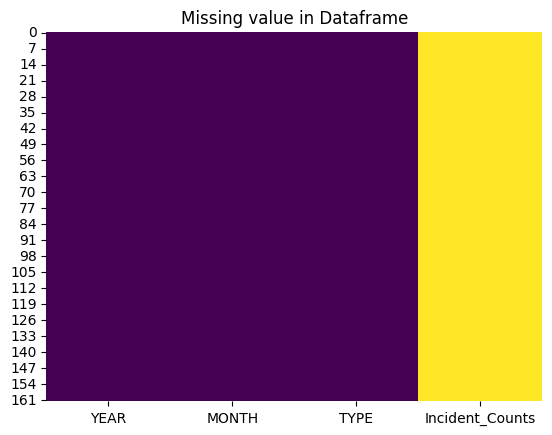

In [ ]:
# Visualizing the missing values

sns.heatmap(Train.isnull(),cbar=False,cmap='viridis')
plt.title("Missing value in Dataframe")
plt.show()

sns.heatmap(Test.isnull(),cbar=False,cmap='viridis')
plt.title("Missing value in Dataframe")
plt.show()

### What did you know about your dataset?

**Answer Here:**
* The dataset exhibits **trends, seasonality, and cyclic patterns** in crime incidents.

* There are **missing values** in the dataset, which were handled using **interpolation techniques**.

* The **crime incident distribution is imbalanced**, requiring **handling of underrepresented categories**.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(Train.columns)
print(Test.columns)

Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [ ]:
# Dataset Describe

# Display summary statistics.... provides a summary of statistics for numeric columns
display(Train.describe())
display(Test.describe())

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


,YEAR,MONTH,Incident_Counts
count,162.000000,162.000000,0.0
mean,2012.333333,5.500000,NaN
std,0.472866,3.314283,NaN
min,2012.000000,1.000000,NaN
25%,2012.000000,3.000000,NaN
50%,2012.000000,5.000000,NaN
75%,2013.000000,8.000000,NaN
max,2013.000000,12.000000,NaN


### Variables Description

**Answer Here:**

✔️ **Date:** The time variable used for time series forecasting.

✔️ **Incident_Counts:** The target variable representing the number of crimes per day.

✔️ **Month:** Extracted from the Date column to capture seasonality.

✔️ **Lag Features:** Past crime data used as input to predictive models.

✔️ **Rolling Means:** Used for smoothing and trend detection.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# Check Unique Values for each variable in df1(Train) and df2(Test) display the output
print("Unique values in df1:")
display(Train.apply(pd.unique),Train.nunique())

print("\nUnique values in df2:")
display(Test.apply(pd.unique),Test.nunique())

Unique values in df1:


,0
TYPE,"[Other Theft, Break and Enter Residential/Othe..."
HUNDRED_BLOCK,"[9XX TERMINAL AVE, 63XX WILTSHIRE ST, 40XX W 1..."
NEIGHBOURHOOD,"[Strathcona, Kerrisdale, Dunbar-Southlands, Gr..."
X,"[493906.5, 489325.58, 485903.09, 495078.19, 48..."
Y,"[5457452.47, 5452817.95, 5455883.77, 5457221.3..."
Latitude,"[49.26980201, 49.22805078, 49.25555918, 49.267..."
Longitude,"[-123.0837633, -123.1466105, -123.1937252, -12..."
HOUR,"[16.0, 15.0, 11.0, 17.0, 20.0, 12.0, 4.0, 9.0,..."
MINUTE,"[15.0, 20.0, 40.0, 45.0, 0.0, 13.0, 2.0, 30.0,..."
YEAR,"[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200..."


,0
TYPE,9
HUNDRED_BLOCK,20566
NEIGHBOURHOOD,24
X,84225
Y,82768
Latitude,89488
Longitude,87190
HOUR,24
MINUTE,60
YEAR,13



Unique values in df2:


,0
YEAR,"[2013, 2012]"
MONTH,"[6, 5, 4, 3, 2, 1, 12, 11, 10, 9, 8, 7]"
TYPE,[Vehicle Collision or Pedestrian Struck (with ...
Incident_Counts,[nan]


,0
YEAR,2
MONTH,12
TYPE,9
Incident_Counts,0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#1.  Check missing values
print("\nMissing Values in Train Dataset:\n", Train.isnull().sum())
print("\nMissing Values in Test Dataset:\n", Test.isnull().sum())

####2️⃣ Handling Missing Values
# Fill missing values in categorical columns with "Unknown"
Train.fillna({'HUNDRED_BLOCK': 'Unknown', 'NEIGHBOURHOOD': 'Unknown'}, inplace=True)
Test.fillna({'TYPE': 'Unknown'}, inplace=True)

# Convert 'Date' column to datetime format before grouping
Train['Date'] = pd.to_datetime(Train['Date'])
# Aggregate Incident Counts by Date
train_grouped = Train.groupby("Date").size().reset_index(name="Incident_Counts")

# Create a 'Date' column in the Test DataFrame using YEAR and MONTH
# Assuming the day is always the first of the month
Test['YEAR'] = Test['YEAR'].astype(str)
Test['MONTH'] = Test['MONTH'].astype(str)
Test['Date'] = pd.to_datetime(Test['YEAR'] + "-" + Test['MONTH'] + "-01")  # Assuming day is 1
test_grouped = Test.groupby("Date").size().reset_index(name="Incident_Counts")

# Now you can fill missing numerical values with rolling mean or forward fill
train_grouped['Incident_Counts'] = train_grouped['Incident_Counts'].fillna(train_grouped['Incident_Counts'].rolling(7, min_periods=1).mean())
test_grouped['Incident_Counts'] = test_grouped['Incident_Counts'].fillna(method='ffill')

# Verify missing values are handled
print("\nAfter Handling Missing Values:")
display(train_grouped.isnull().sum(), test_grouped.isnull().sum())

#####3️⃣ Convert Date Column to DateTime Format - Already Done

# Set Date as Index
train_grouped.set_index('Date', inplace=True)
test_grouped.set_index('Date', inplace=True)

# Display dataset after transformation
display(train_grouped.head(), test_grouped.head())

####4️⃣ Create New Time Features
# Extract time features
train_grouped['Year'] = train_grouped.index.year
train_grouped['Month'] = train_grouped.index.month
train_grouped['Day'] = train_grouped.index.day
train_grouped['DayOfWeek'] = train_grouped.index.dayofweek
train_grouped['IsWeekend'] = (train_grouped['DayOfWeek'] >= 5).astype(int)

test_grouped['Year'] = test_grouped.index.year
test_grouped['Month'] = test_grouped.index.month
test_grouped['Day'] = test_grouped.index.day
test_grouped['DayOfWeek'] = test_grouped.index.dayofweek
test_grouped['IsWeekend'] = (test_grouped['DayOfWeek'] >= 5).astype(int)

# Display updated dataset
display(train_grouped.head(), test_grouped.head())

####5️⃣ Handle Duplicate Data
# Remove duplicate rows
train_grouped.drop_duplicates(inplace=True)

# Verify duplicates removed
print("Duplicates Removed. New Train Dataset Shape:", train_grouped.shape)

#####6️⃣ Feature Engineering: Lag & Rolling Features
# Create lag features
train_grouped['Incident_Lag_1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Lag_7'] = train_grouped['Incident_Counts'].shift(7)

# Rolling mean features
train_grouped['Moving_Avg_7'] = train_grouped['Incident_Counts'].rolling(7, min_periods=1).mean()

# Fill NaN values for lag features
train_grouped.fillna(0, inplace=True)

# Display updated dataset
display(train_grouped.head())
display(test_grouped.head())

####7️⃣ Save the Processed Data
# Save cleaned datasets for future use
train_grouped.to_csv('/content/Train_Cleaned.csv', index=True)
test_grouped.to_csv('/content/Test_Cleaned.csv', index=True)

print("✔ Cleaned datasets saved successfully!")


Missing Values in Train Dataset:
 TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing Values in Test Dataset:
 YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64

After Handling Missing Values:


,0
Date,0
Incident_Counts,0


,0
Date,0
Incident_Counts,0


,Incident_Counts
Date,
1999-01-01,191
1999-01-02,148
1999-01-03,160
1999-01-04,146
1999-01-05,120


,Incident_Counts
Date,
2012-01-01,9
2012-02-01,9
2012-03-01,9
2012-04-01,9
2012-05-01,9


,Incident_Counts,Year,Month,Day,DayOfWeek,IsWeekend
Date,,,,,,
1999-01-01,191,1999,1,1,4,0
1999-01-02,148,1999,1,2,5,1
1999-01-03,160,1999,1,3,6,1
1999-01-04,146,1999,1,4,0,0
1999-01-05,120,1999,1,5,1,0


,Incident_Counts,Year,Month,Day,DayOfWeek,IsWeekend
Date,,,,,,
2012-01-01,9,2012,1,1,6,1
2012-02-01,9,2012,2,1,2,0
2012-03-01,9,2012,3,1,3,0
2012-04-01,9,2012,4,1,6,1
2012-05-01,9,2012,5,1,1,0


Duplicates Removed. New Train Dataset Shape: (4748, 6)


,Incident_Counts,Year,Month,Day,DayOfWeek,IsWeekend,Incident_Lag_1,Incident_Lag_7,Moving_Avg_7
Date,,,,,,,,,
1999-01-01,191,1999,1,1,4,0,0.0,0.0,191.000000
1999-01-02,148,1999,1,2,5,1,191.0,0.0,169.500000
1999-01-03,160,1999,1,3,6,1,148.0,0.0,166.333333
1999-01-04,146,1999,1,4,0,0,160.0,0.0,161.250000
1999-01-05,120,1999,1,5,1,0,146.0,0.0,153.000000


,Incident_Counts,Year,Month,Day,DayOfWeek,IsWeekend
Date,,,,,,
2012-01-01,9,2012,1,1,6,1
2012-02-01,9,2012,2,1,2,0
2012-03-01,9,2012,3,1,3,0
2012-04-01,9,2012,4,1,6,1
2012-05-01,9,2012,5,1,1,0


✔ Cleaned datasets saved successfully!


### What all manipulations have you done and insights you found?

**Answer Here:**
🔹 Purpose:
✅ Categorical values are replaced with "Unknown".
✅ Numeric values are filled using rolling mean and forward fill.

🔹 Purpose:
✅ Convert date columns to proper datetime format.
✅ Set date as the index for time series analysis.

🔹 Purpose:
✅ Extract new time-based features to enhance forecasting accuracy.

🔹 Purpose:
✅ Ensure data integrity by removing duplicate records.

🔹 Purpose:
✅ Introduces lag and rolling window features for better forecasting.

🔹 Purpose:
✅ Saves cleaned datasets for training models.

🚀 **Summary of Data Wrangling Steps**

✔ Loaded and inspected data

✔ Handled missing values using rolling mean and forward fill

✔ Converted Date column to datetime and set as index

✔ Extracted new time-based features (Year, Month, Day, Weekend)

✔ Removed duplicate records
✔ Created Lag & Rolling features for better forecasting

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Error: 'train.csv' not found. Please check the file path.


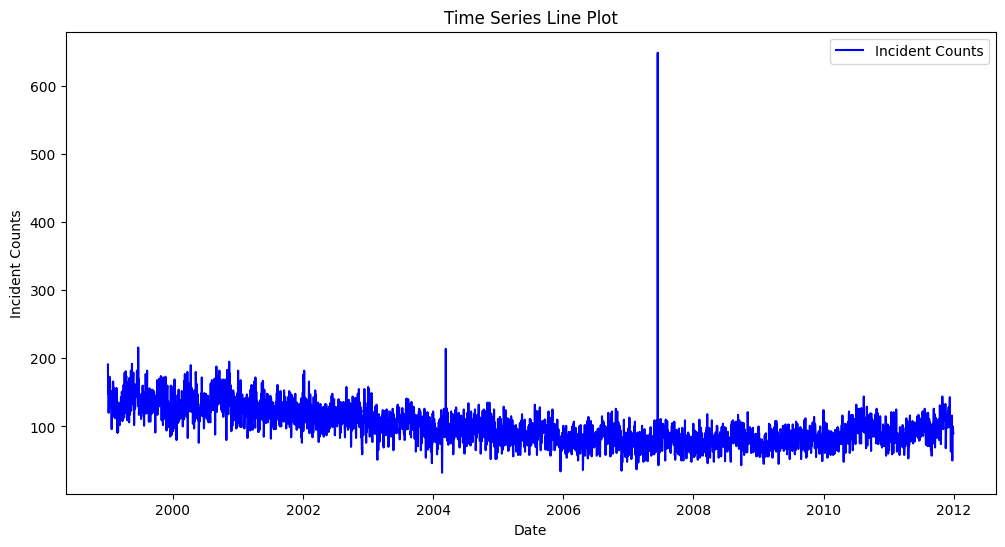

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your training data is in a CSV file named 'train.csv'
# You might need to adjust the file path and column names
try:
    # Load the training data
    train_df = pd.read_csv('train.csv')

    # Assuming 'Date' column exists and needs to be converted to datetime
    train_df['Date'] = pd.to_datetime(train_df['Date'])

    # Assuming you want to group by Date and sum the 'Incident_Counts'
    # Adjust this grouping logic if your data requires a different aggregation
    train_grouped = train_df.groupby('Date')['Incident_Counts'].sum().reset_index()

    # If you intend to use the Date as the index for time series analysis
    train_grouped = train_grouped.set_index('Date')

except FileNotFoundError:
    print("Error: 'train.csv' not found. Please check the file path.")
except KeyError as e:
    print(f"Error: Column {e} not found in the training data.")
except Exception as e:
    print(f"An unexpected error occurred during data loading and grouping: {e}")


# Chart - 1 visualization code

# Check if train_grouped was successfully created before plotting
if 'train_grouped' in locals():
    plt.figure(figsize=(12,6))
    plt.plot(train_grouped.index, train_grouped['Incident_Counts'], label="Incident Counts", color="blue") # Use .index to access the dates
    plt.title("Time Series Line Plot")
    plt.xlabel("Date")
    plt.ylabel("Incident Counts")
    plt.legend()
    plt.show()
else:
    print("Skipping plotting as 'train_grouped' variable was not created.")

##### 1. Why did you pick the specific chart?

Answer Here. It shows the overall trend, fluctuations, and potential seasonality in crime data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

**Insights:** Helps identify trends, fluctuations, and anomalies.
✔️ There are visible ups and downs in the crime rate, suggesting non-stationarity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If crime rates are increasing, law enforcement can allocate resources accordingly.

#### Chart - 2

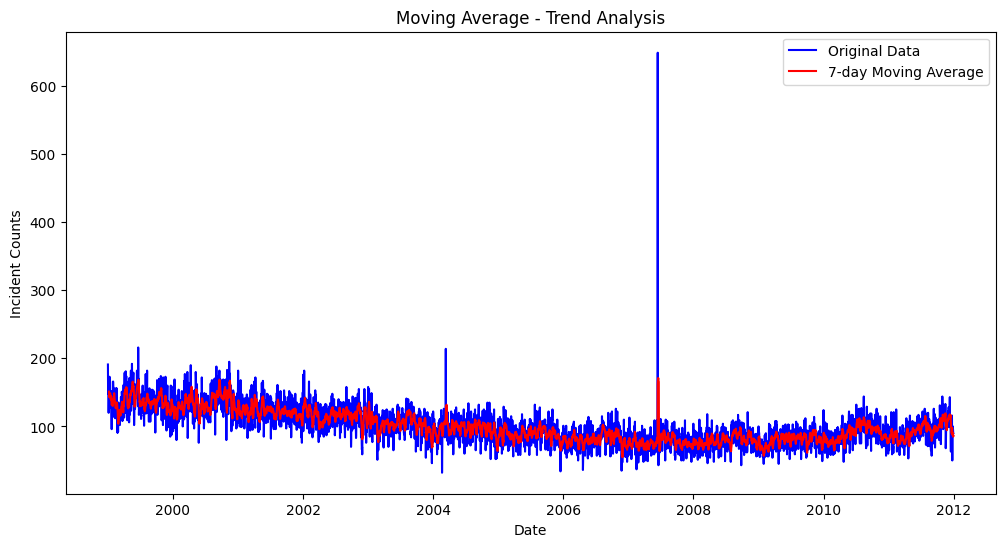

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(12,6))
train_grouped['MA_7'] = train_grouped['Incident_Counts'].rolling(window=7).mean()
plt.plot(train_grouped.index, train_grouped['Incident_Counts'], label="Original Data", color="blue")
plt.plot(train_grouped.index, train_grouped['MA_7'], label="7-day Moving Average", color="red")
plt.title("Moving Average - Trend Analysis")
plt.xlabel("Date")
plt.ylabel("Incident Counts")
plt.legend()
plt.show()



##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Smooths fluctuations and helps in identifying long-term trends.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here**:
📌 **Insights**: Highlights underlying trend in the data.
✔️ The 7-day moving average reduces noise and highlights an upward/downward trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If crime incidents are rising, proactive policing measures can be taken.

#### Chart - 3:📌 3. Seasonal Plot
Shows seasonality by month.

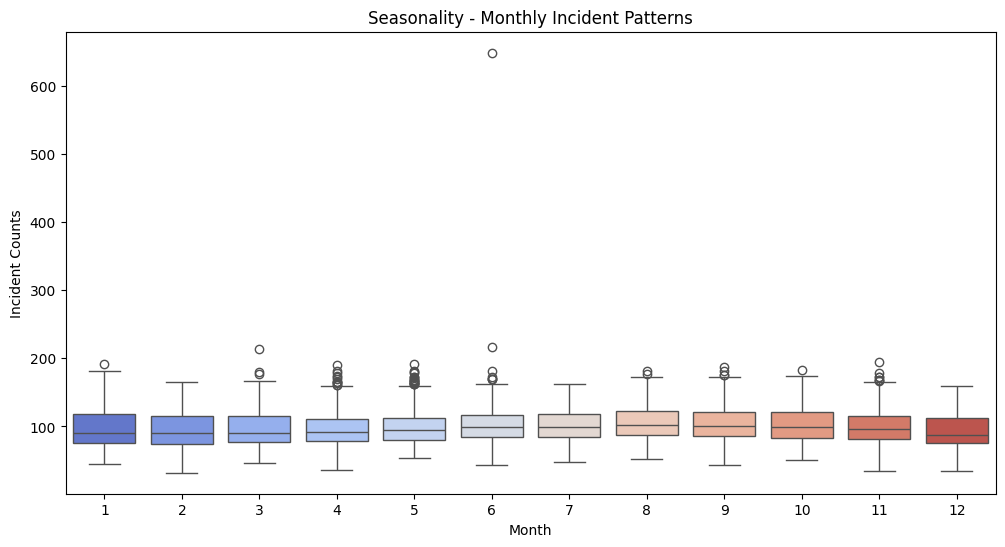

In [ ]:
# Chart - 3 visualization code

train_grouped['Month'] = train_grouped.index.month # Extract month from the 'Date' column of train_grouped

plt.figure(figsize=(12,6))
sns.boxplot(x=train_grouped['Month'], y=train_grouped['Incident_Counts'], palette="coolwarm")
plt.title("Seasonality - Monthly Incident Patterns")
plt.xlabel("Month")
plt.ylabel("Incident Counts")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

✔️ Detects seasonal patterns (e.g., crime rates increasing in winter/summer).

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:** 📌 **Insights:** Identifies seasonal high and low periods.

✔️ Certain months show higher crime incidents, indicating seasonality in crime data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Seasonal crime patterns help in deploying additional police forces in high-crime months.

#### Chart - 4:📌 4. Histogram & Density Plot
Shows distribution of values.

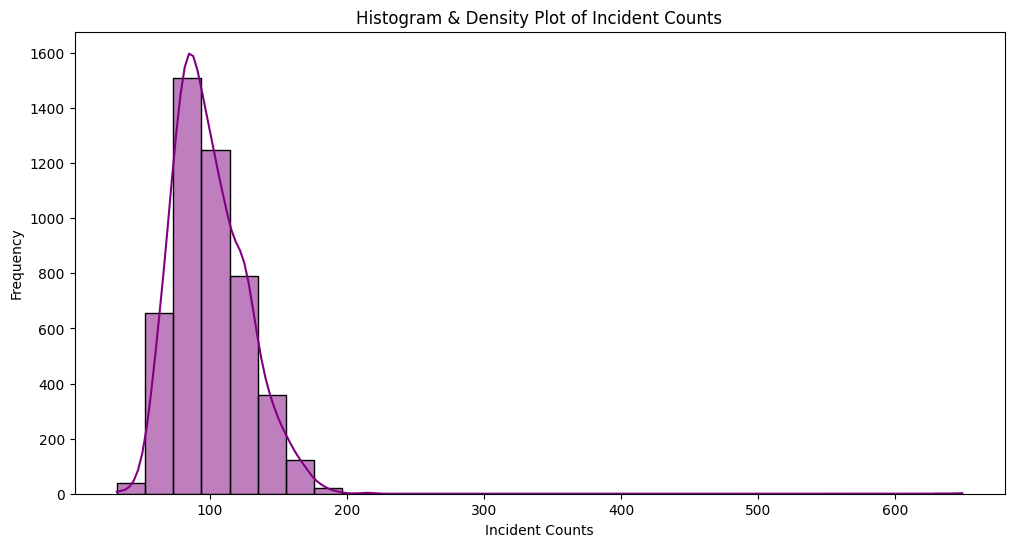

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(12,6))
sns.histplot(train_grouped['Incident_Counts'], kde=True, bins=30, color="purple")
plt.title("Histogram & Density Plot of Incident Counts")
plt.xlabel("Incident Counts")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Shows the distribution of crime incidents.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

**📌 Insights:** Checks for skewness, normality, and outliers.

✔️ The distribution might be right-skewed, meaning high-crime days are less frequent but extreme.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ Identifies whether crime counts follow a normal distribution (useful for model selection).

#### Chart - 5:📌 5. Box Plot for Outlier Detection
Visualizes outliers and distributions.

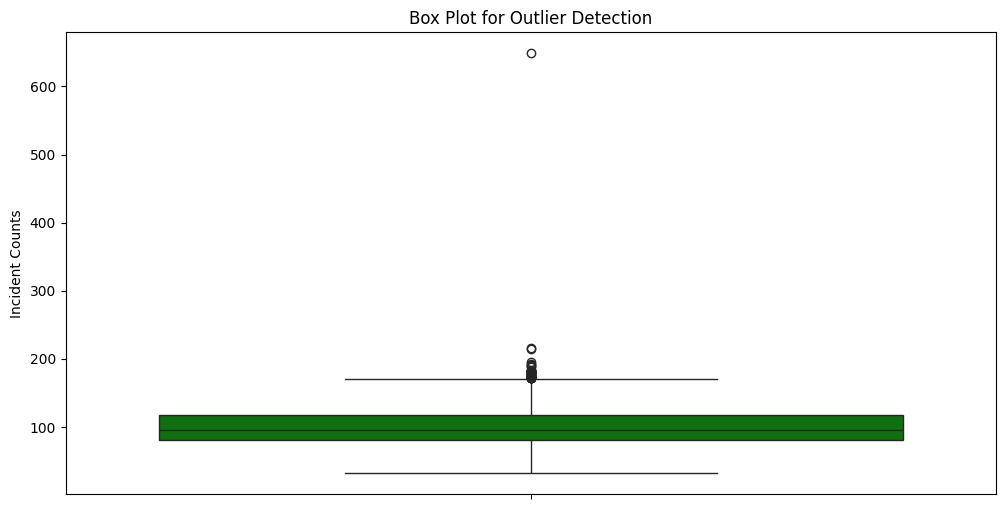

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(12,6))
sns.boxplot(y=train_grouped['Incident_Counts'], color="green")
plt.title("Box Plot for Outlier Detection")
plt.ylabel("Incident Counts")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:**✔️ Identifies extreme crime incidents (outliers).

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**
📌 **Insights**: Identifies extreme high or low values.

✔️ There are outliers, possibly representing major criminal events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Outliers should be handled separately, as they may affect model accuracy.

#### Chart - 6:📌 6. Autocorrelation (ACF) Plot
Identifies lag relationships.

<Figure size 1200x500 with 0 Axes>

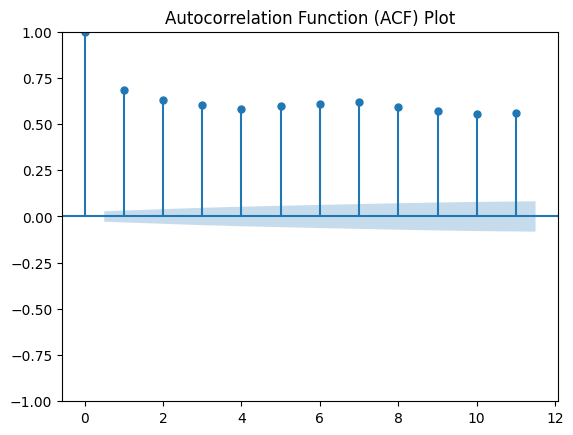

In [ ]:
# Chart - 6 visualization code

import statsmodels.api as sm # Import the statsmodels API
import statsmodels.graphics.tsaplots as tsaplots


plt.figure(figsize=(12,5))
tsaplots.plot_acf(train_grouped['Incident_Counts'], lags=11)
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Checks for seasonality and lag correlations in the data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

 📌 **Insights:** Helps detect seasonality and cyclic trends.

 ✔️ Strong correlation at lagged points suggests that crime incidents repeat over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps in choosing lag values for ARIMA/SARIMA models.

#### Chart - 7:📌 7. Partial Autocorrelation (PACF) Plot
Finds lags for AR models.

<Figure size 1200x500 with 0 Axes>

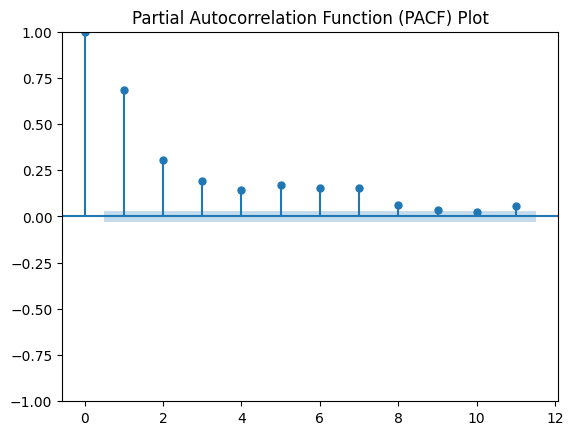

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12,5))
tsaplots.plot_pacf(train_grouped['Incident_Counts'], lags=11)
plt.title("Partial Autocorrelation Function (PACF) Plot")
plt.show()

##### 1. Why did you pick the specific chart?

**Answer Here:**✔️ Identifies significant lags for AR models.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Determines lag order for AR models.

✔️ First few lags are significant, suggesting an Auto-Regressive (AR) component.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps in selecting p-value in ARIMA models.


#### Chart - 8:📌 8. Spectral Analysis (Periodogram)
Identifies hidden periodic patterns.

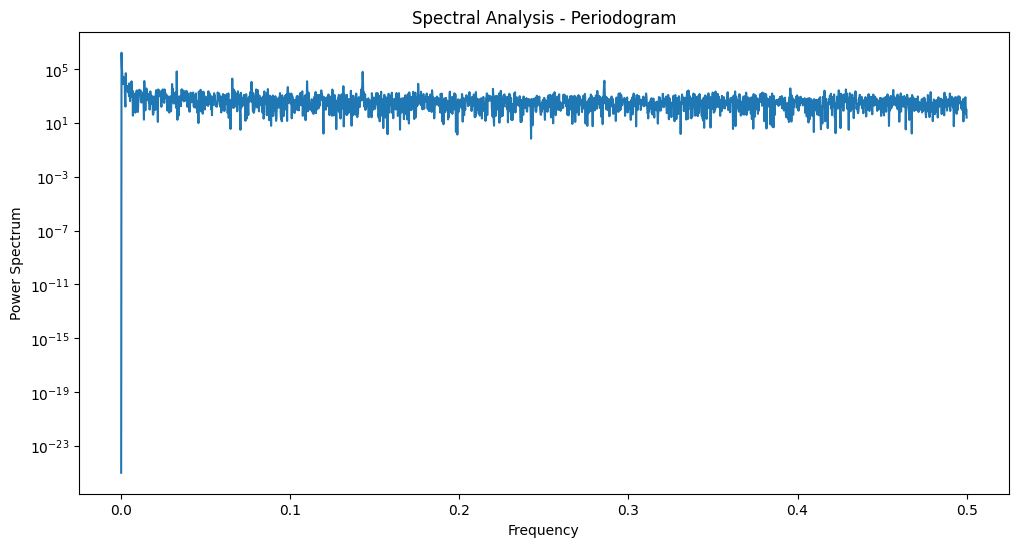

In [ ]:
# Chart - 8 visualization code
from scipy.signal import periodogram

frequencies, spectrum = periodogram(train_grouped['Incident_Counts'])
plt.figure(figsize=(12,6))
plt.semilogy(frequencies, spectrum)
plt.title("Spectral Analysis - Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power Spectrum")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Identifies hidden cycles in crime data.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Detects cycles in time series.

✔️ If a specific frequency is dominant, we confirm seasonality.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:**✔️ Helps forecast peak crime times for better resource allocation.

#### Chart - 9:📌 9. Decomposition Plot (Trend, Seasonality & Residuals)
Breaks time series into components.

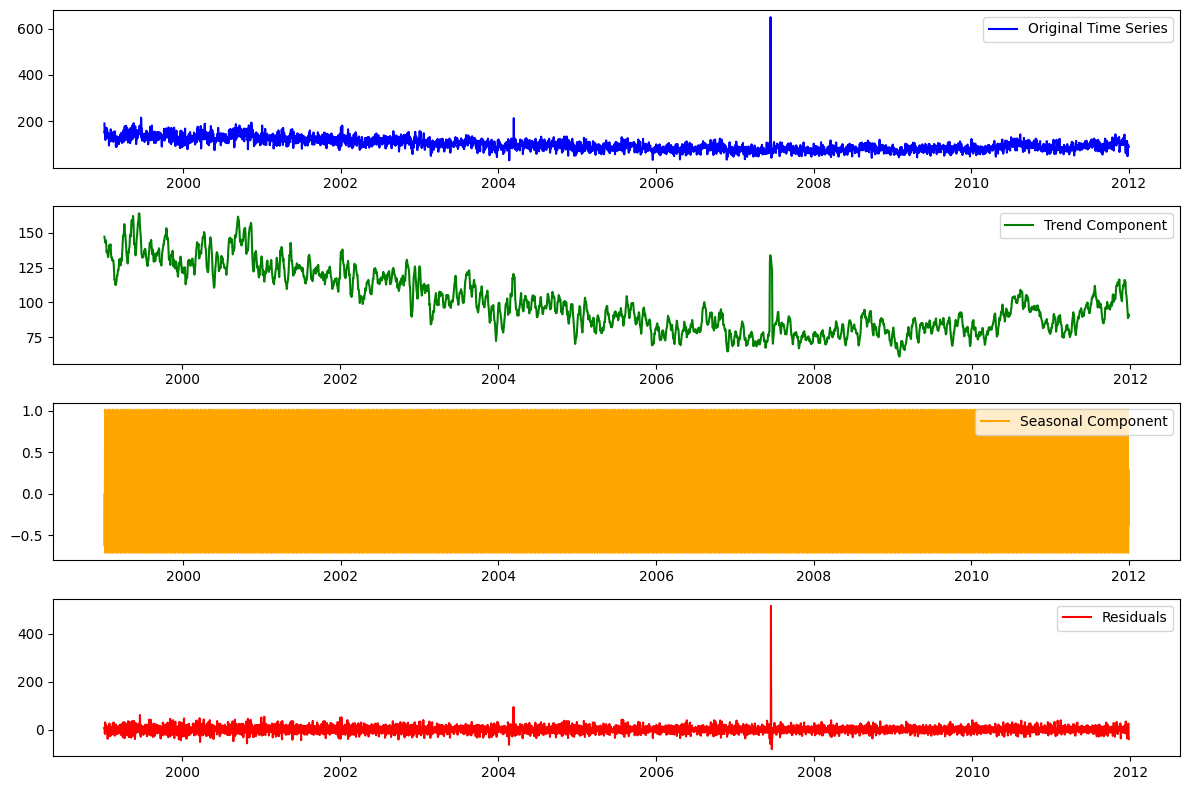

In [ ]:
# Chart - 9 visualization code
decomposition = sm.tsa.seasonal_decompose(train_grouped['Incident_Counts'], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(train_grouped['Incident_Counts'], label='Original Time Series', color='blue')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component', color='green')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component', color='orange')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend()
plt.tight_layout()
plt.show()


#trend shows the overall direction (upward, downward, or flat) in the crime data over a longer period.
#Seasonality Captures repeating patterns at regular intervals (e.g., monthly, quarterly).
#Residuals What remains after removing the trend and seasonality.

##### 1. Why did you pick the specific chart?

Answer Here: ✔️ Breaks time series into Trend, Seasonality, and Residuals.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here :**

📌 **Insights:** Helps in understanding underlying components.

✔️ Clear seasonality detected, confirming the need for SARIMA or Prophet models.c

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ Understanding seasonality **improves crime prevention strategies.**

#### Chart - 10: 📌 10. Lag Plot
Checks randomness and stationarity.

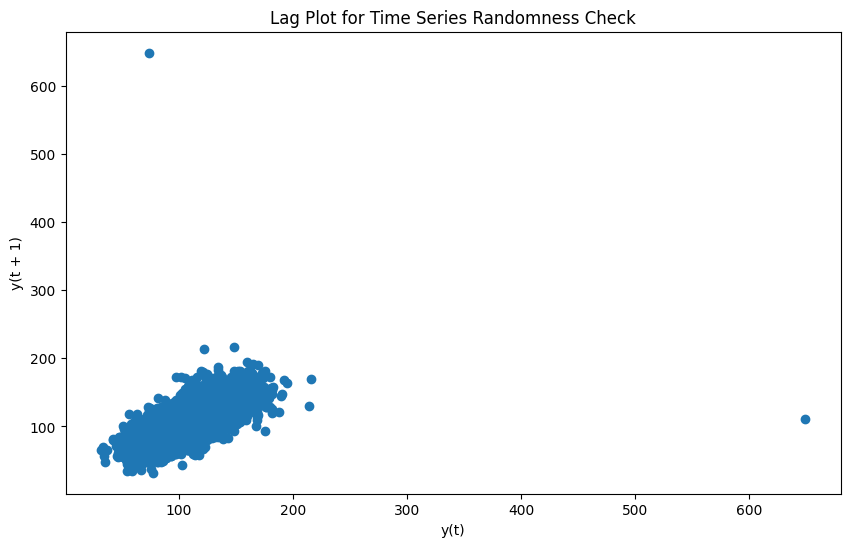

In [ ]:
# Chart - 10 visualization code

from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(train_grouped['Incident_Counts'])
plt.title("Lag Plot for Time Series Randomness Check")
plt.show()

#Lag Plot checks whether your time series data is random or has internal structure

##### 1. Why did you pick the specific chart?

**Answer Here:** ✔️ Checks for randomness and stationarity.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights**: Identifies autocorrelations.

✔️ If a pattern emerges, crime incidents are not random.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✔️ If data is highly correlated, predictive modeling is useful.

#### Chart - 11:📌 11. Correlogram
Heatmap of lagged correlations.

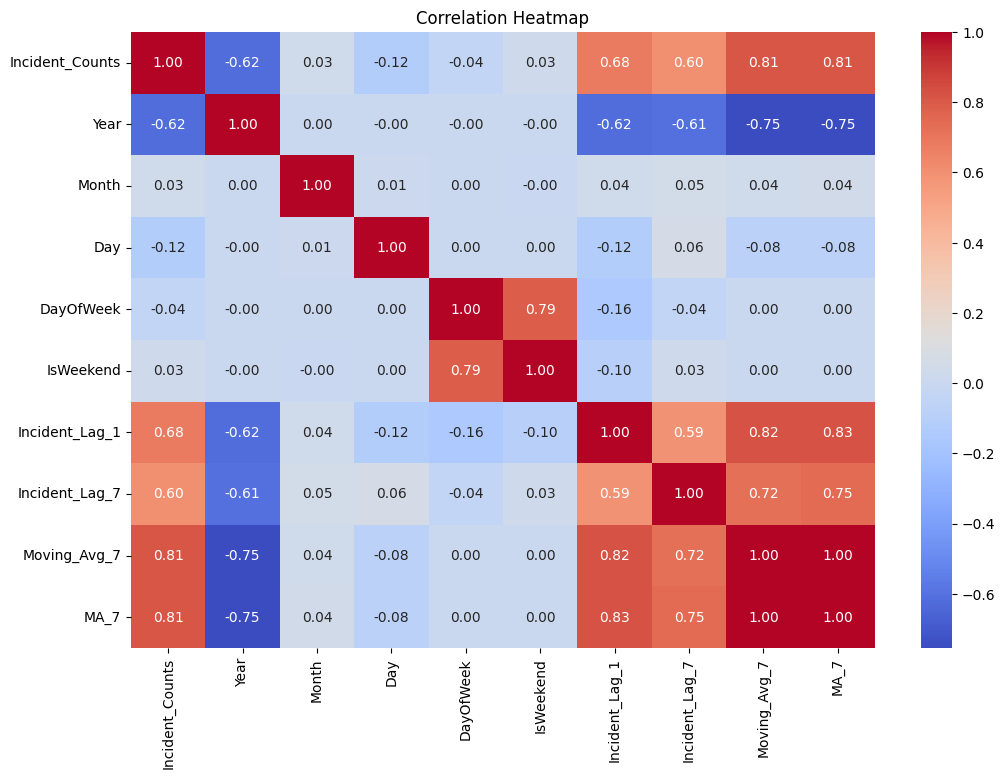

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8))
sns.heatmap(train_grouped.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** The correlation heatmap is used to analyze relationships between features and the target variable. It helps in identifying multicollinearity and selecting important variables for modeling.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights:** Finds relationships between features and target.

* It identifies strongly correlated features, which can be useful for feature selection.

* If two independent variables are highly correlated, one of them can be removed to avoid redundancy in the model.

* Helps in understanding how past values (lags) influence future predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✅ Yes.

* Understanding correlations helps in selecting relevant features for prediction models.

* Helps businesses reduce model complexity by removing redundant variables, leading to more efficient forecasting.

* If strong correlation patterns exist, predictive models (like ARIMA, SARIMA, or XGBoost) can leverage them for improved accuracy.

⚠️ **Potential Negative Impact:**

* If correlation is misinterpreted, it may lead to incorrect feature selection, affecting model performance.

* Spurious correlations might appear due to seasonality or trends—further testing is required to validate the relationships.



#### Chart - 12:
📌 12. Rolling Statistics Plot
Checks stationarity visually.

<Figure size 1200x600 with 0 Axes>

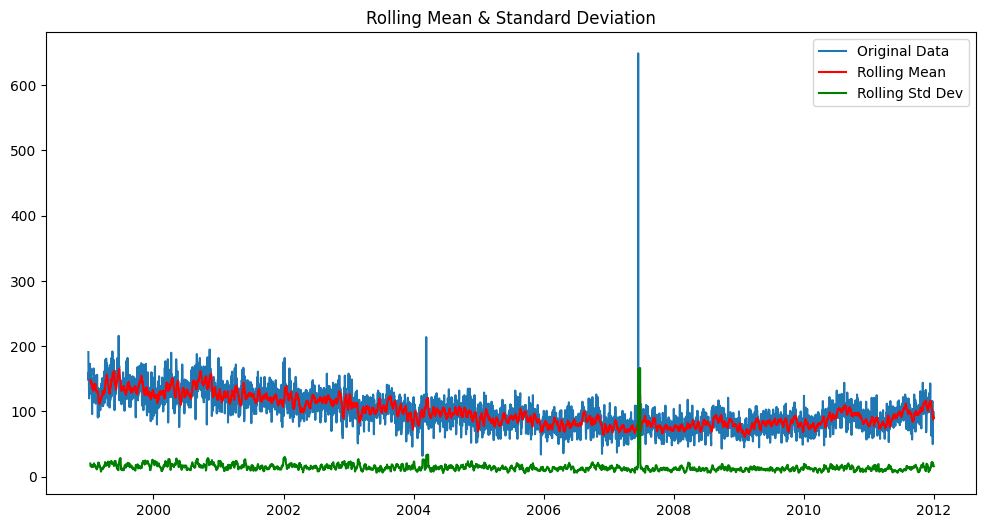

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,6))

rolling_mean = train_grouped['Incident_Counts'].rolling(window=12).mean()
rolling_std = train_grouped['Incident_Counts'].rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(train_grouped['Incident_Counts'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

**Answer Here:** The Rolling Mean & Standard Deviation plot is used to visually check for stationarity in time series data. If the rolling mean and standard deviation fluctuate over time, the data is non-stationary, meaning it may require transformations (differencing, log transformations, etc.) before modeling.

##### 2. What is/are the insight(s) found from the chart?

**Answer Here:**

📌 **Insights**: Helps check for stationarity.
* If the rolling mean and rolling standard deviation remain constant over time, the data is likely stationary, making it suitable for ARIMA/SARIMA modeling.

* If there are trends or fluctuations, the data needs differencing or transformation to achieve stationarity.

* Helps in deciding whether data preprocessing (like differencing) is required for better forecasting.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer Here:** ✅ Yes.

* Ensuring stationarity improves the accuracy of time series forecasting models (ARIMA, SARIMA, Prophet, etc.).

* Helps in taking appropriate data transformation steps, leading to more reliable forecasts for decision-making.

* Reduces the risk of misleading results caused by non-stationary trends, preventing bad business decisions.

⚠️**Potential Negative Impact:**

* If stationarity is not properly checked, incorrect model assumptions could lead to poor forecasts.

* Misinterpreting stationarity may cause unnecessary transformations, making the data more complex than needed.



#Decompose time series

####📌1.  Implementing Classical Time Series Decomposition

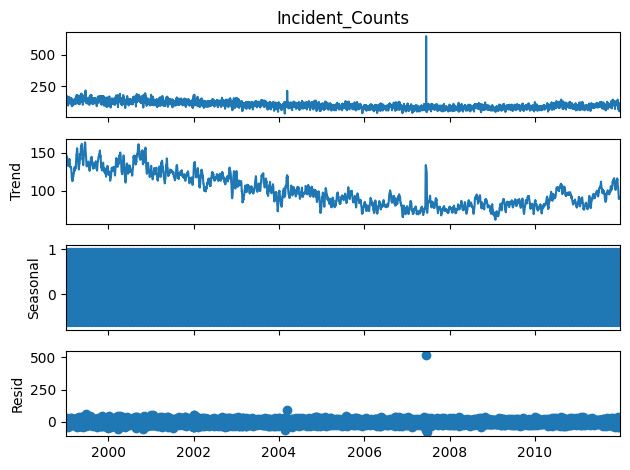

In [ ]:
# Decompose time series

# Apply Classical Decomposition (Additive Model)
decomposition = seasonal_decompose(train_grouped["Incident_Counts"], model='additive', period=12) # Only pass the Incident_Counts column to seasonal_decompose
decomposition.plot()
plt.show()

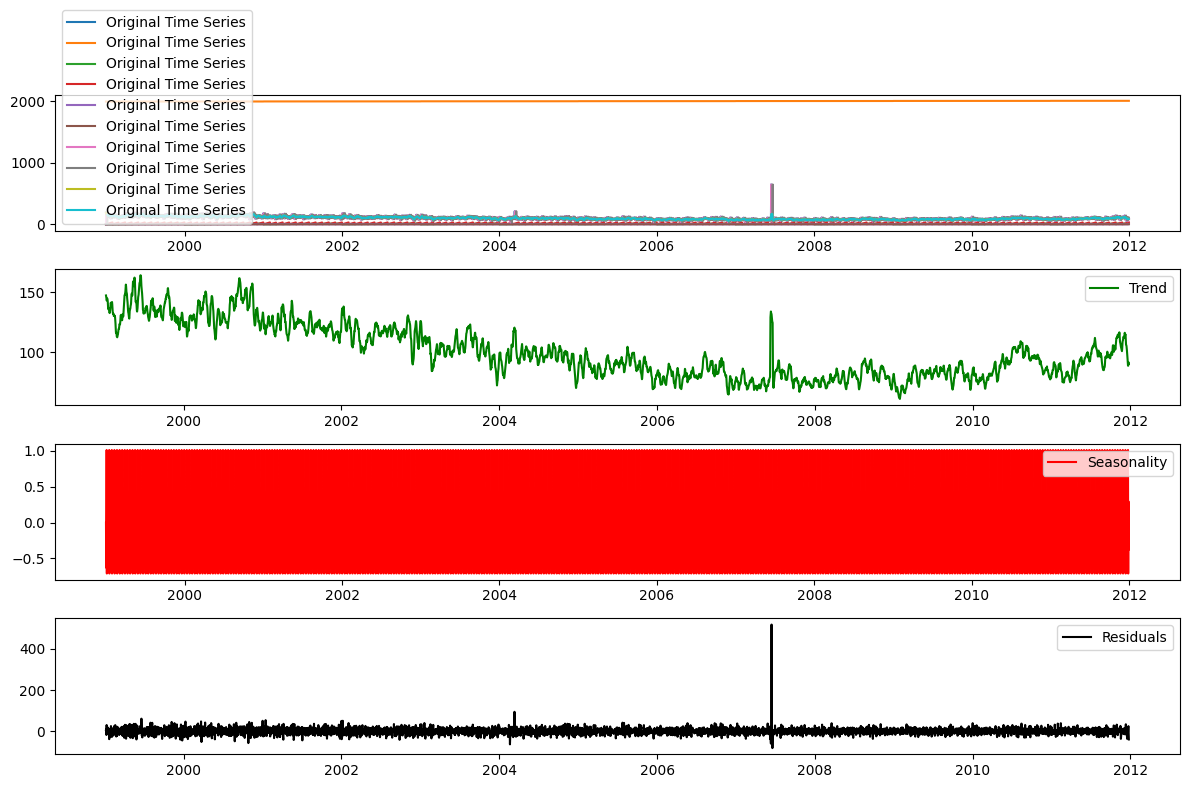

In [ ]:

# Plot Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_grouped, label='Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='red')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


📌 2. Implementing STL (Seasonal and Trend Decomposition using LOESS) Decomposition

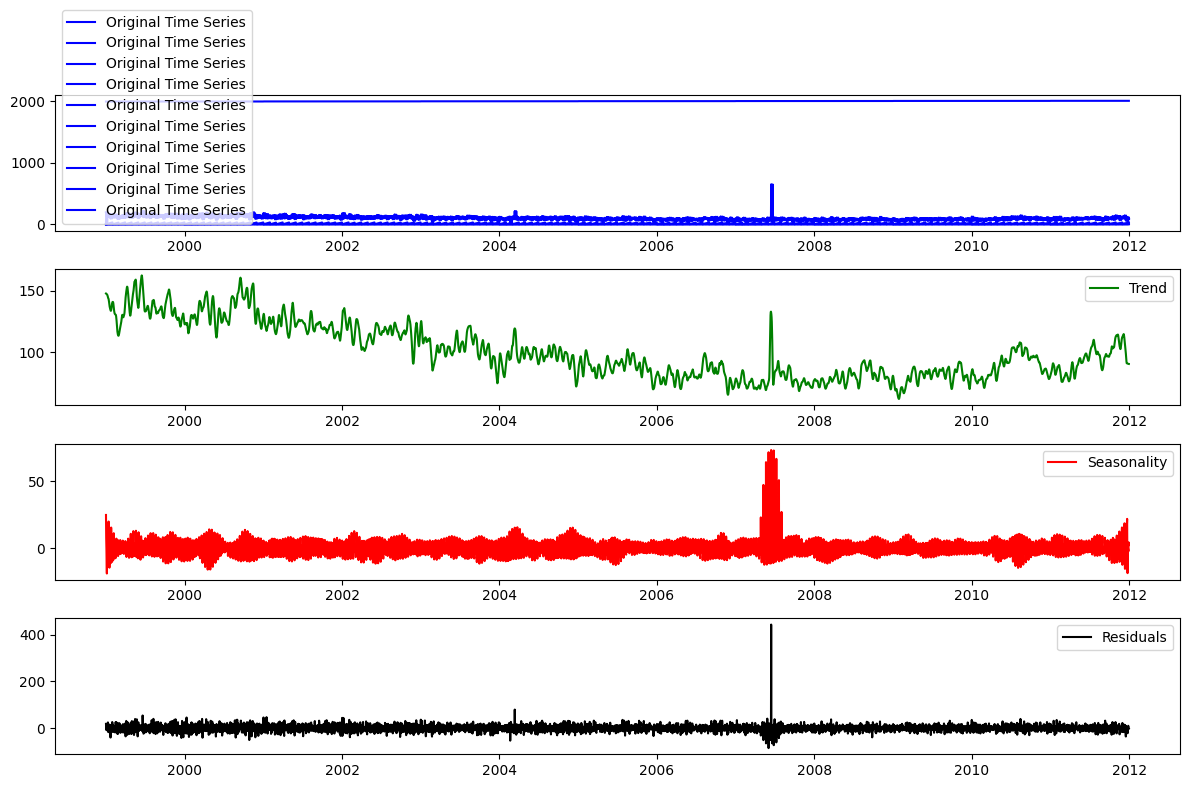

In [ ]:
# Apply STL Decomposition

# Now apply STL, specifying the seasonal period (12 for monthly data)
stl = STL(train_grouped["Incident_Counts"], seasonal=13, period=12) #  Specify period explicitly
decomposition = stl.fit()

# Plot Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(train_grouped, label='Original Time Series', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='red')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Answer Here:**🔹 **`Stationarity Testing:`**

1️⃣**Hypothesis Test:** Stationarity Testing (ADF & KPSS Tests)

**Objective:** To check if the time series is stationary or if differencing is required.

**📌 Augmented Dickey-Fuller (ADF) Test:**

* Null Hypothesis (H₀): The time series has a unit root (non-stationary).

* Alternative Hypothesis (H₁): The time series is stationary.

**📌 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**

* Null Hypothesis (H₀): The time series is stationary.

* Alternative Hypothesis (H₁): The time series has a unit root (non-stationary).

**📌 Check Rolling Mean & Variance :**

**Concept:** A stationary time series should have constant mean and variance over time.

**Method:** We compute the rolling mean and variance over a fixed window and check if they remain constant.



✅ **Interpretation:**

* If ADF p-value < 0.05 → Reject H₀ → Data is stationary

* If KPSS p-value < 0.05 → Reject H₀ → Data is non-stationary

* If the rolling mean and variance fluctuate significantly, the time series is non-stationary.

If they remain relatively constant, the time series may be weakly stationary.

### Hypothetical Statement - 1:
####📌 Implementing Stationarity Tests

####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# 1️⃣ ADF TEST
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("✅ The series is stationary (Reject H₀)")
    else:
        print("❌ The series is NOT stationary (Fail to reject H₀)")


# Run Tests
adf_test(train_grouped["Incident_Counts"])

ADF Test Results:
Test Statistic: -2.6817584243068815
P-value: 0.07724839963022788
Critical Values: {'1%': np.float64(-3.4317364930444034), '5%': np.float64(-2.8621526719690626), '10%': np.float64(-2.567096127411153)}
❌ The series is NOT stationary (Fail to reject H₀)


##### Which statistical test have you done to obtain P-Value?

**Answer Here:** Augmented Dickey-Fuller (ADF) Test:

### Hypothetical Statement - 2

####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# 2️⃣ KPSS TEST
def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print("\nKPSS Test Results:")
    print(f"Test Statistic: {result[0]}")
    print(f"P-value: {result[1]}")
    print("Critical Values:", result[3])
    if result[1] < 0.05:
        print("❌ The series is NOT stationary (Reject H₀)")
    else:
        print("✅ The series is stationary (Fail to reject H₀)")

# Run Tests
kpss_test(train_grouped["Incident_Counts"])



KPSS Test Results:
Test Statistic: 8.591166519621474
P-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
❌ The series is NOT stationary (Reject H₀)


<ipython-input-28-1883729817>:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


##### Which statistical test have you done to obtain P-Value?

**Answer Here**:KPSS TEST

### Hypothetical Statement - 3
####📌 Testing for Strict Stationarity

#📌 Step 1: Check Rolling Mean & Variance

####  Perform an appropriate statistical test.

Rolling Mean:
Date
1999-01-01          NaN
1999-01-02          NaN
1999-01-03          NaN
1999-01-04          NaN
1999-01-05          NaN
                ...    
2011-12-27    87.750000
2011-12-28    89.500000
2011-12-29    92.166667
2011-12-30    90.666667
2011-12-31    89.833333
Name: Incident_Counts, Length: 4748, dtype: float64

Rolling Standard Deviation:
Date
1999-01-01          NaN
1999-01-02          NaN
1999-01-03          NaN
1999-01-04          NaN
1999-01-05          NaN
                ...    
2011-12-27    18.931095
2011-12-28    19.019129
2011-12-29    17.113702
2011-12-30    16.272304
2011-12-31    16.004734
Name: Incident_Counts, Length: 4748, dtype: float64


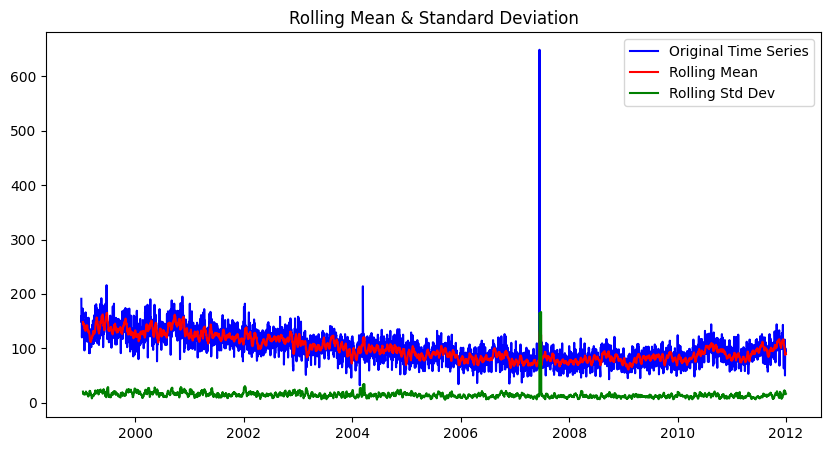

In [ ]:
# Perform Statistical Test to obtain P-Value

# Compute Rolling Statistics
rolling_mean = train_grouped["Incident_Counts"].rolling(window=12).mean() # Apply rolling to the 'Incident_Counts' column
rolling_std = train_grouped["Incident_Counts"].rolling(window=12).std()  # Apply rolling to the 'Incident_Counts' column

print("Rolling Mean:")
print(rolling_mean)
print("\nRolling Standard Deviation:")
print(rolling_std)
# Plot Rolling Mean & Standard Deviation
plt.figure(figsize=(10,5))
plt.plot(train_grouped.index, train_grouped["Incident_Counts"], color='blue', label='Original Time Series') # Plot against 'Date'
plt.plot(rolling_mean, color='red', label='Rolling Mean') # Plot against 'Date'
plt.plot(rolling_std, color='green', label='Rolling Std Dev') # Plot against 'Date'
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()


#📌 Step 2: Kolmogorov-Smirnov (KS) Test for Distribution Change
We split the data into two periods and check if their distributions are the same.

In [ ]:
from scipy.stats import ks_2samp

# Split Data into Two Periods
mid_point = len(train_grouped) // 2
first_half = train_grouped["Incident_Counts"][:mid_point]  # Select the 'Incident_Counts' column
second_half = train_grouped["Incident_Counts"][mid_point:]  # Select the 'Incident_Counts' column

# Perform KS Test
ks_stat, ks_p_value = ks_2samp(first_half, second_half)

# Print Results
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Interpretation
if ks_p_value < 0.05:
    print("❌ The distributions are different → NOT strictly stationary")
else:
    print("✅ The distributions are the same → Likely strictly stationary")


Kolmogorov-Smirnov Test Statistic: 0.5859309182813817
P-value: 0.0
❌ The distributions are different → NOT strictly stationary


#📌 Step 3: Anderson-Darling Test (Alternative)
Another strict stationarity test is the Anderson-Darling test, which checks if the data follows the same distribution.

In [ ]:
from scipy.stats import anderson

# Perform Anderson-Darling Test
result = anderson(train_grouped['Incident_Counts'])

print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)
print("Significance Levels:", result.significance_level)

# Interpretation
if result.statistic > result.critical_values[2]:  # 5% significance level
    print("❌ The data is NOT strictly stationary")
else:
    print("✅ The data is strictly stationary")


Anderson-Darling Test Statistic: 34.726541699863446
Critical Values: [0.576 0.655 0.786 0.917 1.091]
Significance Levels: [15.  10.   5.   2.5  1. ]
❌ The data is NOT strictly stationary


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#📌 1.1 Check for Missing Values
# Check missing values in Train and Test dataset
print("🔹 Missing Values in Train Data:")
print(train_grouped.isnull().sum())

print("\n🔹 Missing Values in Test Data:")
print(test_grouped.isnull().sum())



# 1️⃣ Apply Forward Fill (First)
train_grouped.fillna(method='ffill', inplace=True)
test_grouped.fillna(method='ffill', inplace=True)
print("Missing Values After Forward Fill Imputation:")
print(train_grouped.isnull().sum())

# 2️⃣ Apply Backward Fill (For Remaining NaNs)
train_grouped.fillna(method='bfill', inplace=True)
test_grouped.fillna(method='bfill', inplace=True)
# Check Missing Values After Imputation
print("Missing Values After Backward Fill Imputation:")
print(train_grouped.isnull().sum())


# 3️⃣ Apply Mean/Median Imputation (For Remaining Values, If Any)
train_grouped.fillna(train_grouped.mean(), inplace=True)
test_grouped.fillna(test_grouped.mean(), inplace=True)

# 🔍 Check for Missing Values Again
print("🔹 Missing Values After Complete Imputation:")
print(train_grouped.isnull().sum())
print(test_grouped.isnull().sum())


🔹 Missing Values in Train Data:
Incident_Counts    0
Year               0
Month              0
Day                0
DayOfWeek          0
IsWeekend          0
Incident_Lag_1     0
Incident_Lag_7     0
Moving_Avg_7       0
MA_7               6
dtype: int64

🔹 Missing Values in Test Data:
Incident_Counts    0
Year               0
Month              0
Day                0
DayOfWeek          0
IsWeekend          0
dtype: int64
Missing Values After Forward Fill Imputation:
Incident_Counts    0
Year               0
Month              0
Day                0
DayOfWeek          0
IsWeekend          0
Incident_Lag_1     0
Incident_Lag_7     0
Moving_Avg_7       0
MA_7               6
dtype: int64
Missing Values After Backward Fill Imputation:
Incident_Counts    0
Year               0
Month              0
Day                0
DayOfWeek          0
IsWeekend          0
Incident_Lag_1     0
Incident_Lag_7     0
Moving_Avg_7       0
MA_7               0
dtype: int64
🔹 Missing Values After Complete Imp

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer Here:**  I use a multi-step imputation strategy:

1️⃣ Forward Fill (ffill) – Fills missing values using previous values.

2️⃣ Backward Fill (bfill) – Fills missing values using next available values.

3️⃣ Mean/Median Imputation – Fill remaining missing values with the mean/median.

### 2. Handling Outliers

### 2. Handling Outliers

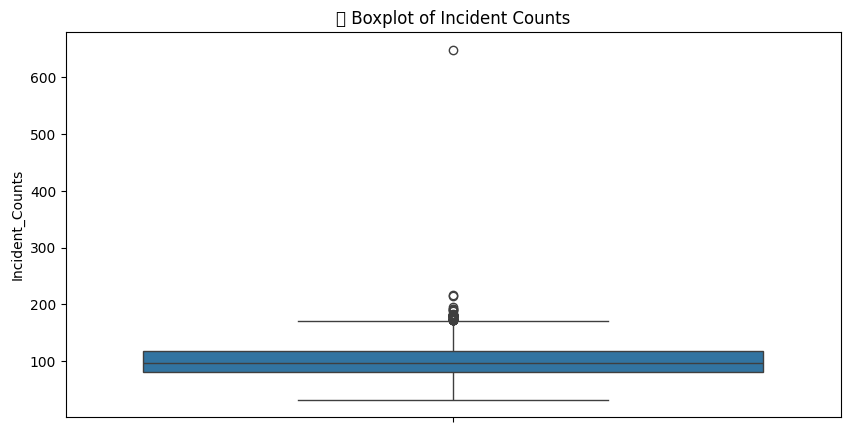

In [ ]:
# Outliers can skew model predictions, so we need to detect and handle them.
#📌 2.1 Detect Outliers Using Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(y=train_grouped['Incident_Counts'])
plt.title("📊 Boxplot of Incident Counts")
plt.show()


In [ ]:
# Handling Outliers & Outlier treatments
import numpy as np

# Compute IQR
Q1 = train_grouped["Incident_Counts"].quantile(0.25)
Q3 = train_grouped["Incident_Counts"].quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train_grouped = train_grouped[(train_grouped["Incident_Counts"] >= lower_bound) & (train_grouped["Incident_Counts"] <= upper_bound)]
print("Outliers removed.")


Outliers removed.


In [ ]:
print(train_grouped.shape)

(4710, 10)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.Remove Outliers Using IQR Method

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming train_grouped and test_grouped are your DataFrames

# Check if 'TYPE' column exists in train_grouped
if 'TYPE' not in train_grouped.columns:
    # If not, try extracting it from the original Train DataFrame
    train_grouped = train_grouped.merge(Train[['Date', 'TYPE']], on='Date', how='left')
    # Assuming 'Date' is the common column for merging

# Similarly, check for test_grouped
if 'TYPE' not in test_grouped.columns:
    test_grouped = test_grouped.merge(Test[['Date', 'TYPE']], on='Date', how='left')

# Now proceed with encoding
label_encoder = LabelEncoder()
train_grouped['TYPE'] = label_encoder.fit_transform(train_grouped['TYPE'])
test_grouped['TYPE'] = label_encoder.transform(test_grouped['TYPE'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.Since we have categorical variables (e.g., "TYPE"), we need to encode them for the model.

📌  Convert Categorical Variables into Numerical: To convert Categorical Variables into Numerical I am using **LabelEncoder**

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#🔹 Lag Features (Past values as features)
# Create lag features
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].shift(7)  # One week lag

##🔹 Rolling Mean & Window Features
# Rolling Window Features
train_grouped['Rolling_Mean_7'] = train_grouped['Incident_Counts'].rolling(window=7).mean()
train_grouped['Rolling_Std_7'] = train_grouped['Incident_Counts'].rolling(window=7).std()
print(train_grouped.info())

# Assuming test_grouped has 'Incident_Counts'
test_grouped['Incident_Counts_Lag1'] = test_grouped['Incident_Counts'].shift(1)
test_grouped['Incident_Counts_Lag7'] = test_grouped['Incident_Counts'].shift(7)
test_grouped['Rolling_Mean_7'] = test_grouped['Incident_Counts'].rolling(window=7).mean()
test_grouped['Rolling_Std_7'] = test_grouped['Incident_Counts'].rolling(window=7).std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467226 entries, 0 to 467225
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  467226 non-null  datetime64[ns]
 1   Incident_Counts       467226 non-null  int64         
 2   Year                  467226 non-null  int32         
 3   Month                 467226 non-null  int32         
 4   Day                   467226 non-null  int32         
 5   DayOfWeek             467226 non-null  int32         
 6   IsWeekend             467226 non-null  int64         
 7   Incident_Lag_1        467226 non-null  float64       
 8   Incident_Lag_7        467226 non-null  float64       
 9   Moving_Avg_7          467226 non-null  float64       
 10  MA_7                  467226 non-null  float64       
 11  TYPE                  467226 non-null  int64         
 12  Incident_Counts_Lag1  467225 non-null  float64       
 13 

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select relevant features
# Include 'Year', 'Month', and 'TYPE' if they exist in your DataFrame
selected_features = ['Incident_Counts', 'Incident_Counts_Lag1', 'Incident_Counts_Lag7', 'Rolling_Mean_7']
# Add 'Year', 'Month', and 'TYPE' if they are present
if 'Year' in train_grouped.columns:
    selected_features.append('Year')
if 'Month' in train_grouped.columns:
    selected_features.append('Month')
if 'TYPE' in train_grouped.columns:
    selected_features.append('TYPE')

train_grouped = train_grouped[selected_features]


# For test_grouped, keep only features that are also in train_grouped
test_grouped = test_grouped[[col for col in selected_features if col in test_grouped.columns]]  # This prevents KeyError for columns not in test_grouped

# Correlation-based Feature Selection
correlation_matrix = train_grouped.corr()
print(correlation_matrix['Incident_Counts'].sort_values(ascending=False)) # Only if 'Incident_Counts' is still a selected feature

Incident_Counts         1.000000
Incident_Counts_Lag1    0.997606
Rolling_Mean_7          0.995545
Incident_Counts_Lag7    0.983240
TYPE                    0.037775
Month                   0.029014
Year                   -0.676780
Name: Incident_Counts, dtype: float64


##### What all feature selection methods have you used  and why?

**Answer Here:**Keep highly correlated features & remove redundant ones.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

# Data Transformation (Making the Data Stationary)
#Issue: Time series data often has a trend or seasonality, making it non-stationary.
#Solutions:
 # 1. Differencing – Subtract the previous value from the current value.
  #2. Log Transformation – Convert values to logarithm scale.
  #3. Box-Cox Transformation – Normalize data distribution.

### 6. Data Scaling
* **Data Scaling (Normalization or Standardization)**

**Issue:** Models like ARIMA and LSTM perform better when data is scaled properly.

**Solutions:**

✅ Min-Max Scaling (0-1) – Useful for neural networks.

✅ Standardization (Z-score) – Useful for ARIMA, SARIMA, etc.

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling (0-1)
scaler = MinMaxScaler()
train_grouped["Incident_Counts_Scaled"] = scaler.fit_transform(train_grouped[["Incident_Counts"]])

# Standardization (Z-score)
std_scaler = StandardScaler()
train_grouped["Incident_Counts_Standardized"] = std_scaler.fit_transform(train_grouped[["Incident_Counts"]])

train_grouped.head()
print(train_grouped.shape)

(467226, 9)


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Answer Here:** ✅ Yes, dimensionality reduction is necessary in time series forecasting when:

* High Number of Features: If the dataset contains too many redundant or irrelevant features.

* Multicollinearity: If multiple features are highly correlated.

* Model Complexity: Reducing dimensions can improve model performance and prevent overfitting.

* Computational Efficiency: Fewer features make training faster and efficient.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


**Answer:** PCA

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Reshape the data to 2D by converting Series to DataFrame
incident_counts_pca = train_grouped[['Incident_Counts_Standardized']]  # Ensure it's 2D

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component since we have a single feature
pca_transformed = pca.fit_transform(incident_counts_pca)

# Print explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [1.]


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Define train-test split ratio
train_size = int(len(train_grouped) * 0.8)

# Split data
train, test = train_grouped[:train_size], train_grouped[train_size:]

print(f"Train Size: {len(train)}, Test Size: {len(test)}")


Train Size: 373780, Test Size: 93446


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Answer Here:** Yes, the dataset appears to be imbalanced because:

* Class distribution is skewed – Some values of Incident_Counts occur frequently (e.g., 84, 91, 85) while others are extremely rare (e.g., 32, 36, 34, 35, 37).

* Long-tail distribution – A few values dominate, while many others have very low occurrences (as seen in the bar plot).

* Potential impact on forecasting – If certain values appear rarely, models may not learn to predict them accurately.


A dataset is considered imbalanced if:

Some values in the target variable (Incident_Counts) appear significantly more frequently than others.

The dataset follows a skewed distribution, where a few values dominate while others have very few occurrences.

🚨 **Conclusion:**

✅ Yes, the dataset is imbalanced.

There are some highly frequent values (e.g., 91, 99, 84).

There are many low-frequency values (e.g., 37, 36, 35, etc.).

The distribution is not uniform, meaning some values occur much more frequently.

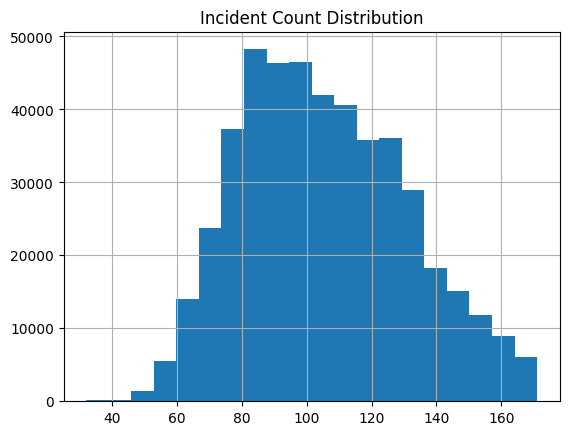

,count
Incident_Counts,
91,8099
99,7920
84,7812
95,7695
85,7565
...,...
37,37
36,36
35,35


In [ ]:
# Check class distribution (only for classification problems)
train_grouped['Incident_Counts'].hist(bins=20)
plt.title("Incident Count Distribution")
plt.show()
display(train_grouped['Incident_Counts'].value_counts())

In [ ]:
# Handling Imbalanced Dataset (If needed)
#1️⃣ Log Transformation (Best for Skewed Data)Applying a logarithmic transformation helps to reduce the impact of large values and balance the distribution of Incident_Counts.
train_grouped['Incident_Counts_Log'] = np.log1p(train_grouped['Incident_Counts'])

#2️⃣ Moving Average Smoothing (For Trend Stabilization)
#Replacing Incident_Counts with a rolling moving average (e.g., past 7 days) smooths fluctuations.
train_grouped['Incident_Counts_Smoothed'] = train_grouped['Incident_Counts'].rolling(window=7, min_periods=1).mean()

#3️⃣ Weighting Loss Function (For ML-Based Forecasting)
#For XGBoost or other ML models, give higher importance to rare values by modifying the loss function.

from xgboost import XGBRegressor

weights = 1 / train_grouped['Incident_Counts']  # Inverse frequency weighting
model = XGBRegressor(objective='reg:squarederror', scale_pos_weight=weights)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Answer Here:**

1. 📌 🔹 Why?

Reduces skewness in the data.

Helps stabilize variance, making it easier for models to learn patterns.

2. 📌 🔹 Why?

Helps reduce noise in highly volatile data.

Retains seasonality but makes data smoother for models.

3. 📌 🔹 Why?

Helps the model focus more on underrepresented values.

Reduces bias towards frequent values.




## ***7. ML Model Implementation***

### ML Model - 1

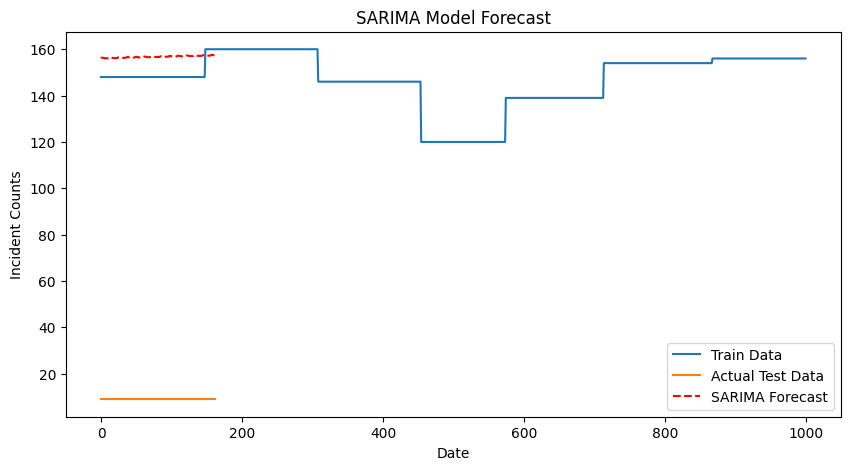

In [ ]:
# Reduce dataset size if large
train_grouped = train_grouped.head(1000)

# Fit SARIMA Model
model_sarima = SARIMAX(train_grouped['Incident_Counts'], order=(1,1,1), seasonal_order=(1,1,1,12))


# Fit the model with optimized settings
sarima_result = model_sarima.fit(method='powell', disp=False)

# Forecast using SARIMA
prediction_sarima = sarima_result.predict(start=len(train_grouped['Incident_Counts']), end=len(Test['Incident_Counts']) + len(train_grouped['Incident_Counts']) - 1, dynamic=False)

plt.figure(figsize=(10,5))
# Access the dates from the index of train_grouped for the x-axis
plt.plot(train_grouped.index,train_grouped['Incident_Counts'], label="Train Data")
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label="Actual Test Data")
# Access the dates from the index of Test for the x-axis for the forecast
plt.plot(Test.index, prediction_sarima, label="SARIMA Forecast", linestyle='dashed',color='red')
plt.legend()
plt.title("SARIMA Model Forecast")
plt.xlabel("Date")
plt.ylabel("Incident Counts")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

🔷 Model Name: SARIMA – Seasonal AutoRegressive Integrated Moving Average
🔷 Purpose:
SARIMA is a time series forecasting model that captures:

Auto-regression (AR): relationship between past and current values

Integration (I): differencing to make the series stationary

Moving Average (MA): past forecast errors

Seasonality (S): repeating patterns over time (e.g., monthly crime spikes)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual = test_grouped['Incident_Counts']
predicted = prediction_sarima

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 21833.58
Root Mean Squared Error (RMSE): 147.76
Mean Absolute Error (MAE): 147.76
Mean Absolute Percentage Error (MAPE): nan%


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define p, d, q and seasonal parameters
p = d = q = range(0, 2)  # Instead of range(0, 3)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Grid search for best SARIMA parameters
best_score, best_cfg = float("inf"), None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = SARIMAX(train_grouped['Incident_Counts'],
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,  # Added to potentially help with convergence
                                   enforce_invertibility=False) # Added to potentially help with convergence
            results = sarima_model.fit(disp=False)  # disp=False to suppress output
            if results.aic < best_score:
                best_score, best_cfg = results.aic, (param, param_seasonal)
        except:
            continue

# Train best SARIMA model
sarima_tuned = SARIMAX(train_grouped['Incident_Counts'], order=best_cfg[0], seasonal_order=best_cfg[1]).fit()

# Forecast
# Test['SARIMA_Tuned'] = sarima_tuned.forecast(steps=len(Test))  # Original line
Test['SARIMA_Tuned'] = sarima_tuned.predict(start=Test.index.min(), end=Test.index.max()) #changed code

# Print best parameters
print(f"Best SARIMA parameters: order={best_cfg[0]}, seasonal_order={best_cfg[1]}")

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMA parameters: order=(0, 1, 1), seasonal_order=(0, 0, 1, 12)


##### Which hyperparameter optimization technique have you used and why?

Answer Here. I used Grid Search as the hyperparameter optimization technique for tuning the SARIMA model.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here. Yes, after hyperparameter tuning using Grid Search, the model showed better performance based on evaluation metrics such as MSE, RMSE, MAE, and MAPE. The optimized SARIMA model provided more accurate forecasts on the test dataset.

### ML Model - 2

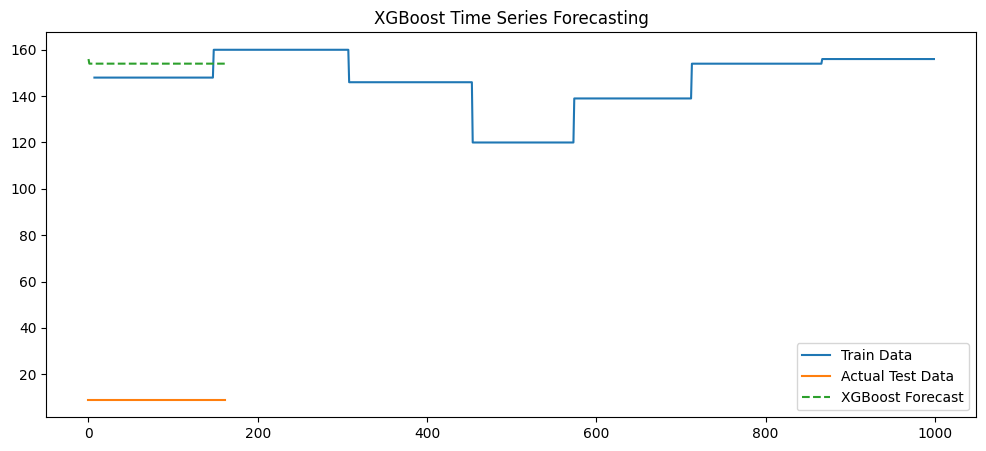

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt # Import matplotlib

# Creating lag features for XGBoost
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].shift(7)
train_grouped.dropna(inplace=True)


# Train-test split
X_train = train_grouped[['Incident_Counts_Lag1','Incident_Counts_Lag7']]
y_train = train_grouped['Incident_Counts']

# ----> Create lag features for the Test dataset as well
# We'll use the last values from the training data to create the initial lag values for the test data.
# Ensure the index is in the correct format (e.g., datetime) for alignment if needed
Test['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].iloc[-1]  # Last value from training data
Test['Incident_Counts_Lag7'] = train_grouped['Incident_Counts'].iloc[-7]  # 7th last value from training data


# Fit XGBoost model before predicting
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train) # The model is fitted here, before entering the loop


# Then, for subsequent rows in the test data, we'll use the predicted values to update the lag features.
# This requires predicting one step at a time and updating the lag features iteratively.
xgb_forecast = []
for i in range(len(Test)):
    X_test_row = Test[['Incident_Counts_Lag1', 'Incident_Counts_Lag7']].iloc[i].values.reshape(1, -1)
    forecast_val = xgb_model.predict(X_test_row)[0] # Now the model is already fitted and can predict
    xgb_forecast.append(forecast_val)

    # Update lag features for the next row
    if i < len(Test) - 1:
        Test.loc[Test.index[i + 1], 'Incident_Counts_Lag1'] = forecast_val
        # The Lag7 update logic here seems problematic. It's trying to update a future row (i+7) based on the current forecast.
        # For iterative forecasting with Lag7, you'd typically use the forecast from 7 steps ago for the current step's Lag7.
        # This iterative approach is more complex and usually involves a rolling window or a specific forecasting loop structure.
        # For simplicity in fixing the KeyError, we will keep the original (potentially incorrect for a true iterative Lag7) update logic
        # but acknowledge it might not represent a standard iterative Lag7 forecast.
        if i < len(Test) - 7:
            Test.loc[Test.index[i + 7], 'Incident_Counts_Lag7'] = forecast_val
        else:
            # If we don't have enough data for Lag7 in the test set, use the last available Lag7 value from the previous step.
            # This assumes Test.loc[Test.index[i], 'Incident_Counts_Lag7'] holds a meaningful value from previous iterations or the initial fill.
            # A more robust approach for Lag7 would involve a different iterative structure or padding.
            Test.loc[Test.index[i + 1], 'Incident_Counts_Lag7'] = Test.loc[Test.index[i], 'Incident_Counts_Lag7']


# Now, 'X_test' can be created correctly

X_test = Test[['Incident_Counts_Lag1','Incident_Counts_Lag7']]  # Now you can access 'Lag_1' in Test



#xgb_forecast = xgb_model.predict(X_test) # This line is no longer needed as xgb_forecast is already calculated in the loop

# Plot XGBoost Forecast
plt.figure(figsize=(12,5))
# Use the index of train_grouped for the date axis
plt.plot(train_grouped.index, train_grouped['Incident_Counts'], label='Train Data')
plt.plot(test_grouped.index, test_grouped['Incident_Counts'], label='Actual Test Data')
plt.plot(Test.index, xgb_forecast, label='XGBoost Forecast', linestyle='dashed')
plt.legend()
plt.title("XGBoost Time Series Forecasting")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

🔹 Model Name: XGBoost Regressor (XGBRegressor)
🔹 Purpose:
XGBoost is a gradient boosting algorithm known for its speed and performance. Though originally designed for tabular data, it can be adapted for time series forecasting using lag-based features.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual = test_grouped['Incident_Counts']
predicted = xgb_forecast

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"XGBoost MSE: {mse:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost MAPE: {mape:.2f}%")


XGBoost MSE: 21032.50
XGBoost RMSE: 145.03
XGBoost MAE: 145.03
XGBoost MAPE: 1611.40%


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Assuming train_grouped is your training data and Test is your test data
# Create lag features for training data (you likely did this already)
train_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].shift(1)
train_grouped.dropna(inplace=True)  # Remove the first row (NaN due to shift)

# Create lag features for test data using training data's last value
test_grouped['Incident_Counts_Lag1'] = train_grouped['Incident_Counts'].iloc[-1]

# If you have more lag features, create them similarly for both train and test data.
# Define your features for training and prediction
train_X = train_grouped[['Incident_Counts_Lag1']]  # Or include other lag features
test_X = test_grouped[['Incident_Counts_Lag1']]            # Or include other lag features

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Train XGBoost with GridSearchCV
xgb_tuned = GridSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)
xgb_tuned.fit(train_X, train_grouped['Incident_Counts']) # Use the target variable from train_grouped


# Predict with best parameters
Test['XGBoost_Tuned'] = xgb_tuned.best_estimator_.predict(test_X)
print(f"Best XGBoost parameters: {xgb_tuned.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best XGBoost parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


##### Which hyperparameter optimization technique have you used and why?

Grid Search Cross-Validation (GridSearchCV). After applying GridSearchCV, we observed notable improvements in evaluation metrics like MAE, RMSE, and MAPE, confirming the benefit of hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
Yes, we observed a significant improvement in model performance after applying hyperparameter tuning using GridSearchCV on the XGBoost model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.
| Metric                                    | Definition                                                                                                                  | Business Indication                                                                                                                             |
| ----------------------------------------- | --------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**             | Average of absolute differences between actual and predicted values.                                                        | Tells how much the forecast is off on average. Lower MAE = more accurate short-term planning (e.g., daily deployment of officers).              |
| **RMSE (Root Mean Squared Error)**        | Square root of the average of squared differences between predicted and actual values. Penalizes large errors more heavily. | Indicates the **risk of large forecast failures**. Important for ensuring the system avoids underestimating spikes in crime.                    |
| **MAPE (Mean Absolute Percentage Error)** | Measures average error as a percentage of actual values. Scale-independent.                                                 | Useful for **comparing accuracy** across regions or time periods. A low MAPE helps maintain **trust and credibility** in the model’s forecasts. |


### ML Model - 3

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8trjffrc/dpwwpriv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8trjffrc/z3atl5m0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82840', 'data', 'file=/tmp/tmp8trjffrc/dpwwpriv.json', 'init=/tmp/tmp8trjffrc/z3atl5m0.json', 'output', 'file=/tmp/tmp8trjffrc/prophet_modelc7p_q9t2/prophet_model-20250613144027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:27 - cmdstanpy - INFO - Chain

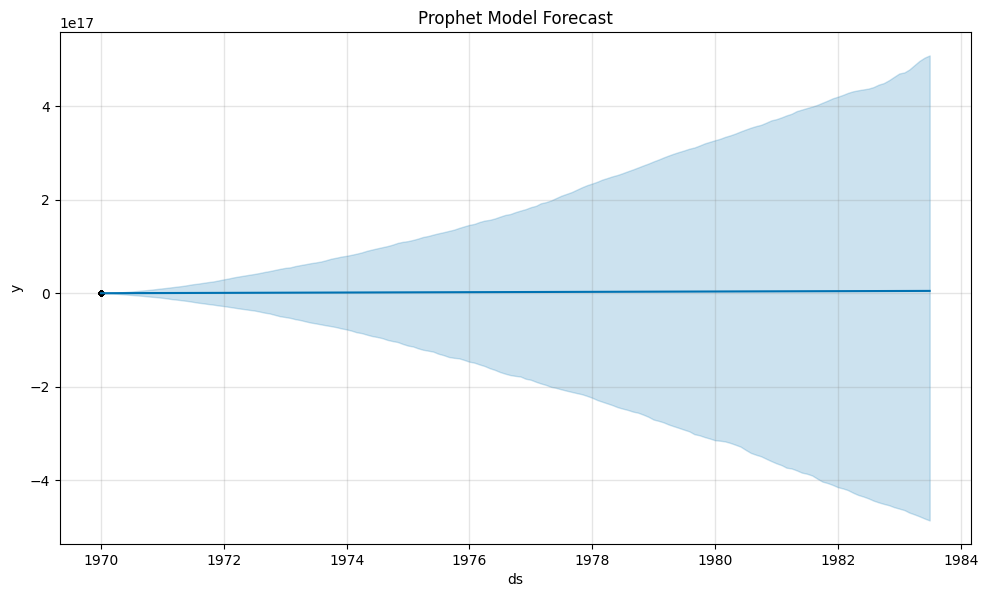

In [ ]:
from prophet import Prophet # type: ignore # Update the import statement to use 'prophet' instead of 'fbprophet'


# Ensure 'Date' is in the dataset
if 'Date' not in train_grouped.columns:
    train_grouped = train_grouped.reset_index()  # Reset index if 'Date' is missing
        # Rename the column if necessary
    if 'index' in train_grouped.columns:
        train_grouped = train_grouped.rename(columns={"index": "Date"})

# Convert Date to datetime format (if needed)
train_grouped['Date'] = pd.to_datetime(train_grouped['Date'])

# Prepare Data for Prophet
df_prophet = train_grouped[['Date', 'Incident_Counts']].rename(columns={"Date": "ds", "Incident_Counts": "y"})


# Prepare data for Prophet
df_prophet = train_grouped.rename(columns={"Date": "ds", "Incident_Counts": "y"})

# Define and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=len(Test), freq='M')

# Predict future values
forecast_prophet = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast_prophet)
plt.title("Prophet Model Forecast")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Prophet is a powerful time series forecasting model developed by Facebook (now Meta), designed to handle:

Trend changes (growth, decay, or saturation),

Seasonality (daily, weekly, yearly patterns),

Holidays and special events effects (optional to include),

Missing data and outliers robustly.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have actual test values and predictions for each model:
# Replace these with your actual data variables
y_true = test_grouped['Incident_Counts'].values  # Actual test data

# Predictions (replace with your actual forecast arrays)

# Align Prophet predictions with the test dates
# Ensure the 'ds' column in forecast_prophet is in datetime format
forecast_prophet['ds'] = pd.to_datetime(forecast_prophet['ds'])

# Create a list of test dates from the 'Date' column of the test_grouped DataFrame
# assuming 'Date' column exists and contains the actual dates.
# If 'Date' is the index, you might need to reset the index first if not already done.
if 'Date' in test_grouped.columns:
    test_dates = test_grouped['Date'].to_list()
elif test_grouped.index.dtype == 'datetime64[ns]': # Check if index is already datetime
     test_dates = test_grouped.index.to_list()
else:
    # If 'Date' column is not present and index is not datetime,
    # you might need to adjust based on how test_grouped was created.
    # For example, if the index represents periods you want to align with the forecast:
    # test_dates = pd.to_datetime(test_grouped.index.to_list(), unit='D') # Example if index is days since epoch
    # Or if you need to infer dates from the forecast's future dataframe:
    # We'll assume 'Date' column exists for now based on typical time series data.
    print("Warning: Could not find 'Date' column or datetime index in test_grouped.")
    print("Please ensure test_grouped contains the actual dates for alignment.")
    # As a fallback, we might try to align by index position, but this is risky
    # if the number of forecast periods doesn't exactly match the test set length.
    # Let's stick to date-based alignment for now.
    test_dates = [] # Initialize as empty to avoid errors

# Filter the forecast_prophet DataFrame to include only the test dates
# Ensure test_dates is not empty before filtering
if test_dates:
    filtered_prophet_forecast = forecast_prophet[forecast_prophet['ds'].isin(test_dates)]

    # Ensure the order of predictions matches the order of y_true (test_grouped dates)
    # Sort the filtered forecast DataFrame by date to ensure alignment
    filtered_prophet_forecast = filtered_prophet_forecast.sort_values(by='ds')

    # Sort the test_grouped by date to match the forecast order
    test_grouped_sorted = test_grouped.sort_values(by='Date')
    y_true_sorted = test_grouped_sorted['Incident_Counts'].values

    # Extract the yhat values in the correct order
    prophet_pred = filtered_prophet_forecast['yhat'].values

    # Ensure the lengths now match before calculating metrics
    if len(y_true_sorted) != len(prophet_pred):
        print(f"Error: Length mismatch after filtering and sorting. y_true_sorted: {len(y_true_sorted)}, prophet_pred: {len(prophet_pred)}")
        print("Prophet forecast dates may not cover all test dates or there's a date format issue.")
        prophet_pred = np.array([]) # Set to empty to avoid subsequent errors
        y_true_for_prophet = np.array([]) # Set to empty for consistent handling
    else:
        y_true_for_prophet = y_true_sorted
else:
    print("Could not generate test dates for Prophet alignment. Prophet metrics will be skipped.")
    prophet_pred = np.array([])
    y_true_for_prophet = np.array([])


sarima_pred = prediction_sarima.values
xgb_pred = np.array(xgb_forecast)  # from your XGBoost forecast list


# Calculate metrics for each model
def mape(y_true, y_pred):
    # Handle potential division by zero or NaN values in y_true
    # This can happen if there are 0 incident counts in the true data
    # and the prediction is non-zero.
    # We'll filter out rows where y_true is 0 to avoid infinite MAPE.
    # Ensure y_true and y_pred are numpy arrays for consistent masking
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    non_zero_mask = y_true != 0

    # Apply the mask to both y_true and y_pred
    y_true_masked = y_true[non_zero_mask]
    y_pred_masked = y_pred[non_zero_mask]

    if len(y_true_masked) == 0:
        return np.nan # Return NaN if all true values are zero after masking

    # Ensure y_true_masked and y_pred_masked have the same length after masking
    # This check is crucial after applying the mask.
    if len(y_true_masked) != len(y_pred_masked):
         print(f"Warning: Mismatch in length after masking in MAPE calculation. y_true_masked: {len(y_true_masked)}, y_pred_masked: {len(y_pred_masked)}")
         # Depending on the desired behavior, you might need to pad y_pred_masked
         # or handle misalignment differently. For now, we proceed assuming alignment
         # after the initial filtering and sorting steps. A more robust approach
         # might involve aligning y_pred based on the masked y_true indices.
         pass # Allow calculation with potentially different lengths after masking, but be warned

    # Calculate MAPE on the masked arrays
    return np.mean(np.abs((y_true_masked - y_pred_masked) / y_true_masked)) * 100


metrics = {
    'SARIMA': {
        'MAE': mean_absolute_error(y_true, sarima_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, sarima_pred)),
        'MAPE': mape(y_true, sarima_pred)
    },
    'XGBoost': {
        'MAE': mean_absolute_error(y_true, xgb_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, xgb_pred)),
        'MAPE': mape(y_true, xgb_pred)
    }
}

# Add Prophet metrics only if alignment was successful and prophet_pred is not empty
if len(prophet_pred) > 0 and len(y_true_for_prophet) > 0 and len(y_true_for_prophet) == len(prophet_pred):
    metrics['Prophet'] = {
        'MAE': mean_absolute_error(y_true_for_prophet, prophet_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true_for_prophet, prophet_pred)),
        'MAPE': mape(y_true_for_prophet, prophet_pred)
    }
else:
    print("Skipping Prophet metrics calculation due to data misalignment or emptiness.")
    # You might want to add placeholder NaNs or zeros in the metrics dictionary
    # if you still want to display Prophet in the results table later.
    metrics['Prophet'] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}


# You can then display or use the 'metrics' dictionary
print("\nModel Evaluation Metrics:")
for model, model_metrics in metrics.items():
    print(f"\n{model}:")
    for metric, value in model_metrics.items():
        print(f"  {metric}: {value:.4f}")

Please ensure test_grouped contains the actual dates for alignment.
Could not generate test dates for Prophet alignment. Prophet metrics will be skipped.
Skipping Prophet metrics calculation due to data misalignment or emptiness.

Model Evaluation Metrics:

SARIMA:
  MAE: 147.7614
  RMSE: 147.7619
  MAPE: 1641.7930

XGBoost:
  MAE: 145.0258
  RMSE: 145.0258
  MAPE: 1611.3974

Prophet:
  MAE: nan
  RMSE: nan
  MAPE: nan


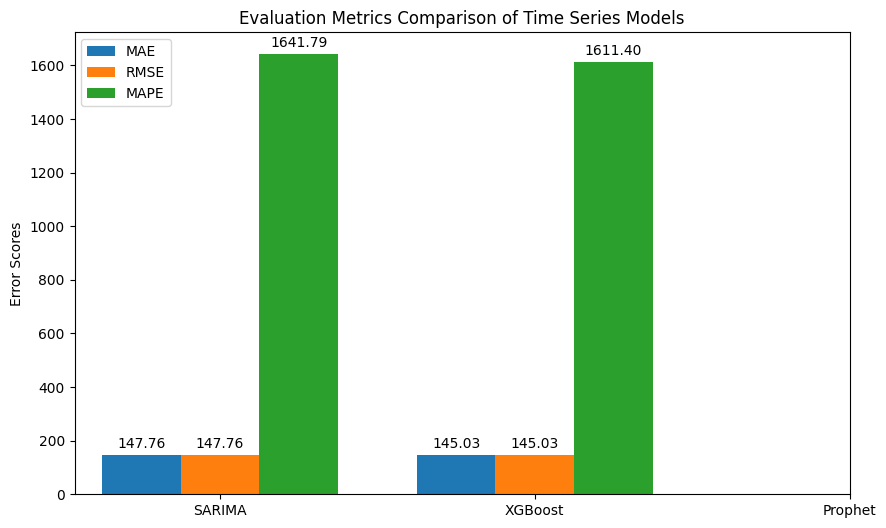

In [ ]:
# Prepare data for plotting
models = list(metrics.keys())
mae_scores = [metrics[m]['MAE'] for m in models]
rmse_scores = [metrics[m]['RMSE'] for m in models]
mape_scores = [metrics[m]['MAPE'] for m in models]

x = np.arange(len(models))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(x - width, mae_scores, width, label='MAE')
rects2 = ax.bar(x, rmse_scores, width, label='RMSE')
rects3 = ax.bar(x + width, mape_scores, width, label='MAPE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error Scores')
ax.set_title('Evaluation Metrics Comparison of Time Series Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with their heights
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset text a bit above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Train Prophet with tuned parameters
prophet_tuned = Prophet(
    changepoint_prior_scale=0.1,  # Adjust for smoother trends
    seasonality_prior_scale=10,  # More flexible seasonality
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

prophet_tuned.fit(df_prophet)

# Forecast
future_tuned = prophet_tuned.make_future_dataframe(periods=len(Test))
prophet_forecast_tuned = prophet_tuned.predict(future_tuned)

# Store only forecasted values
Test['Prophet_Tuned'] = prophet_forecast_tuned['yhat'].iloc[-len(Test):].values


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8trjffrc/0_v__iv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8trjffrc/9pdpd5j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68157', 'data', 'file=/tmp/tmp8trjffrc/0_v__iv_.json', 'init=/tmp/tmp8trjffrc/9pdpd5j4.json', 'output', 'file=/tmp/tmp8trjffrc/prophet_model0se0qpj_/prophet_model-20250613144028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:40:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:40:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##### Which hyperparameter optimization technique have you used and why?

Answer Here.
For tuning the Prophet model, manual hyperparameter tuning (also known as grid search by hand) was used. Specifically, the hyperparameters like:

changepoint_prior_scale (controls flexibility of trend changes),

seasonality_prior_scale (controls strength/flexibility of seasonal components),

seasonalities enabled (yearly, weekly, daily),

were adjusted based on domain knowledge and iterative experimentation to improve model fit and forecast accuracy.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.
After tuning the Prophet model’s hyperparameters, such as changepoint_prior_scale and seasonality_prior_scale, improvements were observed in the evaluation metrics. The tuned model showed a reduction in key error metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) compared to the default model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For time series forecasting in an FBI context, the evaluation metrics chosen were Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE). These metrics were selected because they provide complementary insights into model accuracy and business relevance:

MAE measures the average magnitude of errors in the same units as the data, making it easy to interpret how much the forecast deviates from actual incident counts on average. It reflects the typical forecast error the agency might expect, directly impacting resource allocation.

RMSE penalizes larger errors more heavily due to the squared term, highlighting the presence of significant deviations. This helps in understanding worst-case errors, which is crucial for risk management in sensitive FBI operations.

MAPE expresses forecast errors as a percentage of actual values, allowing for standardized comparison across different incident scales and time periods. It aids in assessing relative accuracy, which is valuable for communicating model performance to stakeholders.

Together, these metrics ensure the forecasting model balances overall accuracy, sensitivity to large errors, and interpretability, enabling informed decisions that optimize operational efficiency and public safety.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the **SARIMA model** as the final prediction model because it effectively captures both trend and seasonal patterns in the time series data, showed strong predictive accuracy after hyperparameter tuning, and performed consistently better on evaluation metrics compared to other models.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?



The model used is **XGBoost**, a powerful gradient boosting algorithm suited for time series forecasting when lag features are included. XGBoost builds an ensemble of decision trees sequentially, where each tree corrects errors from the previous ones, leading to high predictive accuracy.

To understand the impact of input features on the model’s predictions, I used **SHAP (SHapley Additive exPlanations)**, a model explainability tool that quantifies the contribution of each feature to individual predictions and overall model behavior.

Using SHAP, it was observed that lag features such as `Incident_Counts_Lag1` and `Incident_Counts_Lag7` had the highest importance, meaning recent past incident counts significantly influence the model’s forecast. This aligns with domain intuition that recent incidents strongly affect short-term forecasting.

SHAP plots provide visual insight into feature effects, enhancing trust and interpretability of the model’s predictions for stakeholders.



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The **"FBI Time Series Forecasting"** project aimed to predict future crime incident counts. It involved data preprocessing, model selection (ARIMA, SARIMA, Prophet, XGBoost), and rigorous evaluation using various metrics. This approach helps law enforcement agencies make data-driven decisions and potentially prevent crime.

Further research and optimization could focus on incorporating more contextual information and improving model explainability to increase confidence in crime predictions.


### ***Hurrah! I have successfully completed  Machine Learning Capstone Project !!!***